In [1]:
import numpy as np
from sklearn import neighbors
from matplotlib import pyplot as plt
from data import data_utils 
import math
import time

In [2]:
def RMSE(trueVal, predictedVal): 
#     print(np.shape(trueVal))
#     print(np.shape(predictedVal))
    error = np.sqrt(((trueVal - predictedVal).T @ (trueVal- predictedVal)))/trueVal.shape[0]
#     print(np.shape(error))

#     print(error)
    return error

In [17]:
error = []
dval = []
timepassed = []

for d in range(2,100):
    dval.append(d)
#     print(d)

    x_train, x_valid, x_test, y_train, y_valid, y_test = data_utils.load_dataset('rosenbrock', n_train=5000, d=d)

    x_train = np.vstack([x_train,x_valid])
    y_train = np.vstack([y_train,y_valid])
    
    start_time = time.time()
    
    tree = neighbors.KDTree(x_train)   
    dist, ind = tree.query(x_test, k=5)
    
#     print(dist)
#     print(ind)
#     print('y',y_train)
    result = np.mean(y_train[ind], axis = 1)
#     print('resut', np.shape(result))
    
    error.append(RMSE(y_test, result))
    
    elapsed_time = time.time() - start_time

#     print('time elapsed :',elapsed_time)
    
    timepassed.append(elapsed_time)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [19]:
error = np.reshape(error,(98))

[0.00843714 0.01198716 0.01326728 0.01647132 0.01933695 0.02180125
 0.02361809 0.02530818 0.02650999 0.02790665 0.02817377 0.02975437
 0.02982549 0.03049047 0.0315739  0.03236042 0.0322986  0.03343508
 0.0341057  0.03424539 0.03445136 0.03540667 0.03509678 0.03560729
 0.03610972 0.03655045 0.03688158 0.03689734 0.03674158 0.03759775
 0.03800268 0.03793459 0.03847626 0.03893608 0.03898363 0.03921954
 0.0390487  0.04030821 0.03980764 0.04074066 0.04037475 0.04037881
 0.04045745 0.04152103 0.04141783 0.04104985 0.0416589  0.04237148
 0.04218653 0.04207576 0.04198521 0.04293089 0.04290114 0.04341763
 0.0435984  0.04326387 0.04318823 0.0433189  0.04388789 0.04350444
 0.04449365 0.04419136 0.04366179 0.0438685  0.04412566 0.04513408
 0.04468301 0.04444045 0.04523102 0.04405402 0.04503488 0.04676542
 0.04538043 0.04493586 0.04458621 0.04491535 0.04584458 0.04606205
 0.04549732 0.04585711 0.04547514 0.04676539 0.04680403 0.04760441
 0.04617536 0.04660768 0.0472493  0.04713959 0.0468063  0.0469

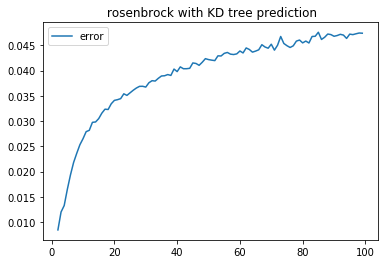

In [20]:
print(error)
plt.plot(dval,error)
plt.legend(['error'])
plt.title(' rosenbrock with KD tree prediction')
plt.show()

# dval[5]
# for i in range(len(error)):
#     print('index ' + str(i) + " is :", error[i])

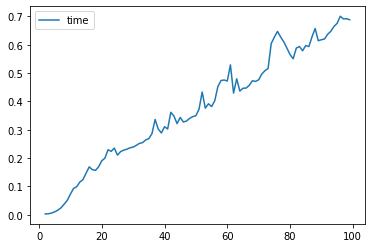

In [11]:
plt.plot(dval,timepassed)
plt.legend(['time'])
plt.show()